In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,scale
from sklearn.utils import resample

<h2>Attribute Information:</h2>

<p>This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:</p>
<p>X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.</p>
<p>X2: Gender (1 = male; 2 = female).</p>
<p>X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).</p>
<p>X4: Marital status (1 = married; 2 = single; 3 = others).</p>
<p>X5: Age (year).</p>
<p>X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.</p>
<p>X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.</p>
<p>X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.</p>

In [272]:
data=pd.read_csv("DefaultCC.csv")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [273]:
data.drop("ID",axis=1,inplace=True)

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [275]:
data['SEX'].unique()

array([2, 1], dtype=int64)

<p>1 - Male</p>
<p>2-Female</p>

In [276]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [277]:
# data.drop(data[data['EDUCATION']>4].index,axis=0,inplace=True)
# data['EDUCATION'].unique()

In [278]:
data.rename({"default payment next month": "DefaultCC"},axis=1,inplace=True)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultCC
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [279]:
len(data[data['EDUCATION']==0])

14

In [280]:
data.drop(data[data['EDUCATION']==0].index,axis=0,inplace=True)


In [281]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [282]:
data.drop(data[data['MARRIAGE']==0].index,axis=0,inplace=True)


<h3>Downsclaing the Data</h3>

In [283]:
DefaultData=resample(data[data['DefaultCC']==1],n_samples=1000,replace=False,random_state=42)
NonDefaultData=resample(data[data['DefaultCC']==0],n_samples=1000,replace=False,random_state=42)


In [284]:
FinalData=pd.concat([DefaultData,NonDefaultData],axis=0)
# FinalData=data.copy()

In [285]:
data.shape

(29932, 24)

In [286]:
df=data.corr()['DefaultCC']
df


LIMIT_BAL   -0.153718
SEX         -0.039843
EDUCATION    0.028118
MARRIAGE    -0.026154
AGE          0.014224
PAY_0        0.325143
PAY_2        0.263634
PAY_3        0.235240
PAY_4        0.216707
PAY_5        0.204275
PAY_6        0.186854
BILL_AMT1   -0.020027
BILL_AMT2   -0.014517
BILL_AMT3   -0.014421
BILL_AMT4   -0.010495
BILL_AMT5   -0.007123
BILL_AMT6   -0.005753
PAY_AMT1    -0.072868
PAY_AMT2    -0.058596
PAY_AMT3    -0.056222
PAY_AMT4    -0.056911
PAY_AMT5    -0.055283
PAY_AMT6    -0.053321
DefaultCC    1.000000
Name: DefaultCC, dtype: float64

In [287]:
SelectedFeatures2=[]
for i in df.index:
    if (df[i])<-0.1 or df[i]>0.1:
        SelectedFeatures2.append(i)
SelectedFeatures2
    
    

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'DefaultCC']

In [288]:
FinalData=FinalData[SelectedFeatures2]
FinalData

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DefaultCC
19982,300000,3,2,2,2,2,2,1
19350,80000,2,0,0,-2,-2,-2,1
17057,30000,2,2,0,0,0,0,1
26996,80000,2,2,2,2,2,2,1
23621,210000,-2,-2,-2,-2,-2,-2,1
...,...,...,...,...,...,...,...,...
18942,150000,-1,-1,-2,-2,-2,-2,0
29836,180000,-2,-2,-2,-2,-2,-2,0
19424,90000,-1,-1,-1,-1,-1,-1,0
25593,120000,0,0,0,0,0,0,0


In [289]:
SelectedFeatures2.remove('DefaultCC')
SelectedFeatures2

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [290]:
FinalData.drop(FinalData[FinalData['LIMIT_BAL']>48000].index,axis=0,inplace=True)

<AxesSubplot:>

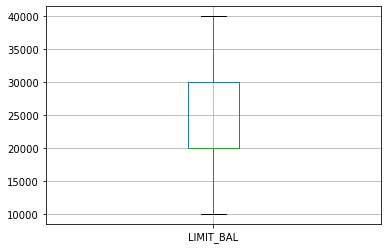

In [291]:
FinalData.boxplot('LIMIT_BAL')
    

In [292]:
X,Y=FinalData[SelectedFeatures2],FinalData['DefaultCC']

In [293]:
X=pd.get_dummies(X,columns=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X

,LIMIT_BAL,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_5,PAY_0_7,PAY_2_-2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
17057,30000,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6916,10000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9583,20000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7247,20000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19232,30000,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13900,30000,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20478,30000,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21478,20000,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
870,20000,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [294]:
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,train_size=0.8,random_state=101)

In [295]:
XTrain=scale(XTrain)
XTest=scale(XTest)

In [296]:
SelectedFeatures=FinalData.columns.delete(1)

In [297]:
FinalData.shape

(334, 8)

In [298]:
TrainX,TestX,TrainY,TestY=train_test_split(FinalData[SelectedFeatures],FinalData['DefaultCC'],train_size=0.8,random_state=101)

In [299]:
svm=SVC()
svm.fit(XTrain,YTrain)

SVC()

In [300]:
svm.score(XTest,YTest)

0.7910447761194029

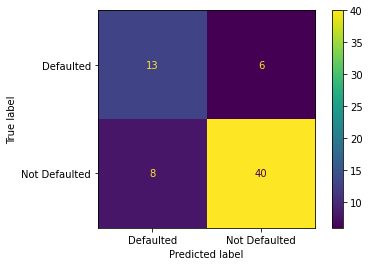

In [301]:
plot_confusion_matrix(svm,XTest,YTest,display_labels=['Defaulted','Not Defaulted'])

In [302]:
param_grid=[{'C':[1,10,100,1000],'gamma':['scale',1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}]

OptimalParam=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=0,scoring='accuracy')
OptimalParam.fit(TrainX,TrainY)
print(OptimalParam.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [307]:
BetterModel=SVC(C=1000,gamma=0.001,kernel='rbf')
BetterModel.fit(XTrain,YTrain)
BetterModel.score(XTest,YTest)

0.7761194029850746

<p>Which means that our old model was better than the new one and we will stick with it</p>